Name : Ameya Kannurkar

Roll No : B1951042

PRN : 72018171C

Class : BE IT B


# Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [ ]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


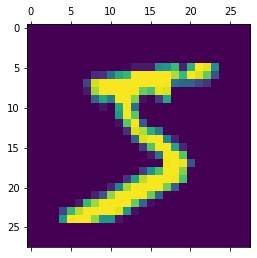

In [ ]:
#to see how first image looks
plt.matshow(x_train[0])

In [ ]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [ ]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [ ]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6383 - accuracy: 0.8369 - val_loss: 0.3558 - val_accuracy: 0.9040
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3380 - accuracy: 0.9048 - val_loss: 0.2949 - val_accuracy: 0.9185
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2897 - accuracy: 0.9181 - val_loss: 0.2608 - val_accuracy: 0.9271
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9279 - val_loss: 0.2379 - val_accuracy: 0.9341
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2354 - accuracy: 0.9345 - val_loss: 0.2200 - val_accuracy: 0.9362
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2162 - accuracy: 0.9394 - val_loss: 0.2046 - val_accuracy: 0.9410
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2006 - accuracy: 0.9445 - val_loss: 0.1923 - val_accuracy:

# Evaluate the Model

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1611 - accuracy: 0.9531
Loss = 0.161
Accuracy = 0.953


# Making Prediction on New Data

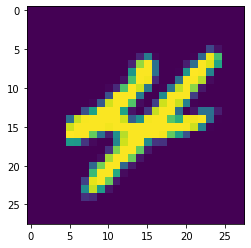

In [ ]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [ ]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 966    0    1    3    0    4    4    1    1    0]
 [   0 1112    4    1    0    1    3    2   12    0]
 [   7    2  977    7    7    2    7   10   11    2]
 [   1    0   11  961    1   10    1   11   11    3]
 [   1    1    6    0  936    0    9    3    4   22]
 [   7    1    1   18    2  833   11    1   12    6]
 [   9    3    3    0    8    9  922    0    4    0]
 [   0   10   14    4    5    2    0  981    1   11]
 [   3    2    3   12    9    9   10    9  914    3]
 [   9    7    1    9   26    4    1   15    8  929]], shape=(10, 10), dtype=int32)
